In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('Train.csv')

In [3]:
data.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [6]:
data['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

In [9]:
le=LabelEncoder()
y=data['label'].values


In [10]:
y=le.fit_transform(y)

In [12]:
y[:250]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0])

In [25]:
data['review'][1]

'http://video.google.com/videoplay?docid=211772166650071408&hl=en Distribution was tried.<br /><br />We opted for mass appeal.<br /><br />We want the best possible viewing range so, we forgo profit and continue our manual labor jobs gladly to entertain you for working yours.<br /><br />View Texas tale, please write about it... If you like it or not, if you like Alex or not, if you like Stuie, Texas or Texas tale... Just write about it.<br /><br />Your opinion rules.'

# DATA Cleaning

In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import Tf

In [20]:
sw=set(stopwords.words('english'))

In [37]:
ps=PorterStemmer()

In [40]:
def clean_text(sample):
    sample=sample.lower()
    sample=sample.replace('<br /><br />'," ")
    sample=re.sub("[^a-zA-Z]+"," ",sample)
    sample=sample.split()
    sample=[ps.stem(w) for w in sample if w not in sw]
    
    sample=" ".join(sample)
    
    return sample
                         
                         
    

In [41]:
clean_text(data['review'][1])

'http video googl com videoplay docid hl en distribut tri opt mass appeal want best possibl view rang forgo profit continu manual labor job gladli entertain work view texa tale pleas write like like alex like stuie texa texa tale write opinion rule'

In [42]:
data['cleaned review']=data['review'].apply(clean_text)

In [43]:
data.head()

,review,label,cleaned review
0,mature intelligent and highly charged melodram...,pos,matur intellig highli charg melodrama unbelive...
1,http://video.google.com/videoplay?docid=211772...,pos,http video googl com videoplay docid hl en dis...
2,Title: Opera (1987) Director: Dario Argento Ca...,pos,titl opera director dario argento cast cristin...
3,I think a lot of people just wrote this off as...,pos,think lot peopl wrote anoth one tom cruis weir...
4,This is a story of two dogs and a cat looking ...,pos,stori two dog cat look way back home old wise ...


In [44]:
corpus=data['cleaned review'].values

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [53]:
cv=CountVectorizer(max_df=0.5,max_features=50000,ngram_range=(1,2))

In [54]:
x=cv.fit_transform(corpus)

In [55]:
print(x[0])

  (0, 26610)	1
  (0, 21177)	1
  (0, 19751)	1
  (0, 6690)	1
  (0, 26961)	1
  (0, 6903)	1
  (0, 47952)	2
  (0, 42192)	2
  (0, 32487)	1
  (0, 25099)	1
  (0, 45307)	1
  (0, 39808)	1
  (0, 38057)	1
  (0, 25649)	1
  (0, 42888)	1
  (0, 42196)	1
  (0, 25238)	1
  (0, 39839)	1
  (0, 25650)	1
  (0, 15079)	1


In [58]:
tfidf=TfidfTransformer()
x=tfidf.fit_transform(x)

In [59]:
print(x[0])

  (0, 47952)	0.5705048332523356
  (0, 45307)	0.21013455193563996
  (0, 42888)	0.0807605651597615
  (0, 42196)	0.2667135737243946
  (0, 42192)	0.3136383200740674
  (0, 39839)	0.27175326330318533
  (0, 39808)	0.11581974627111254
  (0, 38057)	0.061293989764687834
  (0, 32487)	0.08817487593319984
  (0, 26961)	0.18304897018257207
  (0, 26610)	0.17743002684554332
  (0, 25650)	0.2699807887769281
  (0, 25649)	0.1679693544763305
  (0, 25238)	0.22295906236259994
  (0, 25099)	0.07570776635988502
  (0, 21177)	0.13843305325579347
  (0, 19751)	0.1290389111391168
  (0, 15079)	0.18083303756964572
  (0, 6903)	0.19193516763325505
  (0, 6690)	0.16928074912361452


In [62]:
x.shape

(40000, 50000)

In [63]:
y.shape

(40000,)

# Building the ANN

In [84]:
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout
from keras.callbacks import ModelCheckpoint

In [88]:
model=Sequential()
model.add(Dense(16,activation='relu',input_shape=(x.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                800016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [93]:
callback=ModelCheckpoint('my_best.h5', monitor='val_acc', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [94]:
hist=model.fit(x,y,validation_split=0.3,batch_size=128,epochs=5,callbacks=[callback])

Train on 28000 samples, validate on 12000 samples
Epoch 1/5
28000/28000 [==============================] - 32s 1ms/step - loss: 0.5320 - accuracy: 0.7709 - val_loss: 0.3098 - val_accuracy: 0.8974
Epoch 2/5
28000/28000 [==============================] - 30s 1ms/step - loss: 0.2427 - accuracy: 0.9284 - val_loss: 0.2361 - val_accuracy: 0.9070
Epoch 3/5
28000/28000 [==============================] - 30s 1ms/step - loss: 0.1353 - accuracy: 0.9687 - val_loss: 0.2532 - val_accuracy: 0.9029
Epoch 4/5
28000/28000 [==============================] - 31s 1ms/step - loss: 0.0837 - accuracy: 0.9862 - val_loss: 0.2785 - val_accuracy: 0.8993
Epoch 5/5
28000/28000 [==============================] - 30s 1ms/step - loss: 0.0554 - accuracy: 0.9922 - val_loss: 0.3313 - val_accuracy: 0.8978


In [103]:
res=hist.history

In [104]:
res

{'val_loss': [0.3097783477306366,
  0.23611670370896656,
  0.2531748975118001,
  0.2785228674411774,
  0.33134906975428263],
 'val_accuracy': [0.8974166512489319,
  0.9070000052452087,
  0.902916669845581,
  0.8993333578109741,
  0.8977500200271606],
 'loss': [0.5319895480360304,
  0.2427071158034461,
  0.1352551532813481,
  0.08369831562893731,
  0.05536563909053802],
 'accuracy': [0.77089286, 0.9283928, 0.9687143, 0.9862143, 0.99217856]}

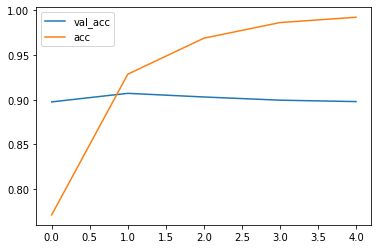

In [105]:
plt.plot(res['val_accuracy'],label='val_acc')
plt.plot(res['accuracy'],label='acc')
plt.legend()
plt.show()

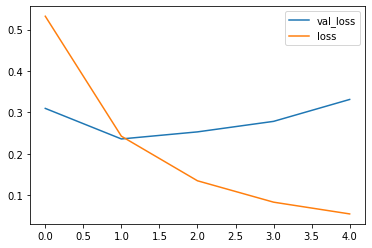

In [106]:
plt.plot(res['val_loss'],label='val_loss')
plt.plot(res['loss'],label='loss')
plt.legend()
plt.show()

In [108]:
model=load_model('my_best.h5')

# TEST

In [95]:
test=pd.read_csv('Test.csv')

In [96]:
test.shape

(10000, 1)

In [97]:
test.head()

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [100]:
test['cleaned_review']=test['review'].apply(clean_text)

In [101]:
X_test=test['cleaned_review']


In [102]:
X_test=cv.transform(X_test)

In [109]:
X_test=tfidf.transform(X_test)

In [110]:
y_pred=model.predict_classes(X_test)

In [114]:
y_pred[:100]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    

In [116]:
dic={0:'neg',1:'pos'}
y_pred=[dic[p[0]] for p in y_pred]

In [117]:
y_pred

['neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


In [118]:
idx=np.arange(10000)
df=pd.DataFrame({'Id':idx,'label':y_pred})
df

,Id,label
0,0,neg
1,1,neg
2,2,neg
3,3,pos
4,4,pos
...,...,...
9995,9995,neg
9996,9996,pos
9997,9997,pos
9998,9998,pos


In [119]:
df.to_csv('ans_ann.csv',index=False)


In [120]:
new_df=pd.read_csv('ans_ann.csv')
new_df.head()

,Id,label
0,0,neg
1,1,neg
2,2,neg
3,3,pos
4,4,pos
